### Importing TensorFlow

In [2]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
#print('Using TensorFlow version', tf.__version__)

### Importing MNIST

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [4]:
print( 'x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plotting an Image Example

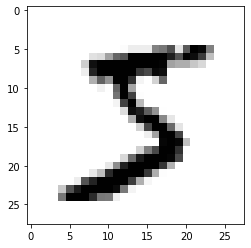

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

### Displaying Labels

In [6]:
y_train[0]

5

In [7]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Display Encoded Labels

In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

### Data Normalization

In [11]:
#making pixel data around 0 value
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


### Reshaping Pixel Values to 28x28x1 matrix

In [12]:
x_train_norm = x_train_norm.reshape(-1,28,28,1)
x_test_norm = x_test_norm.reshape(-1,28,28,1)

### Creating the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
#model = Sequential([
#    Dense(128,activation='relu',input_shape=(784,)),
 #   Dense(128,activation='relu'),
  #  Dense(10,activation='softmax')
#])


### Compiling the Model

In [14]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

### Training the Model

In [15]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.4205 - accuracy: 0.8609
Epoch 2/3
60000/60000 [==============================] - 188s 3ms/sample - loss: 0.1301 - accuracy: 0.9599
Epoch 3/3
60000/60000 [==============================] - 190s 3ms/sample - loss: 0.0971 - accuracy: 0.9700


### Evaluating the Model

In [17]:
_,accuracy= model.evaluate(x_test_norm,y_test_encoded,verbose=2)
print('Accuracy: ',accuracy * 100)

10000/1 - 6s - loss: 0.0193 - accuracy: 0.9864
Accuracy:  98.64000082015991


### Predictions on Test Set

shape of preds:  (10000, 10)


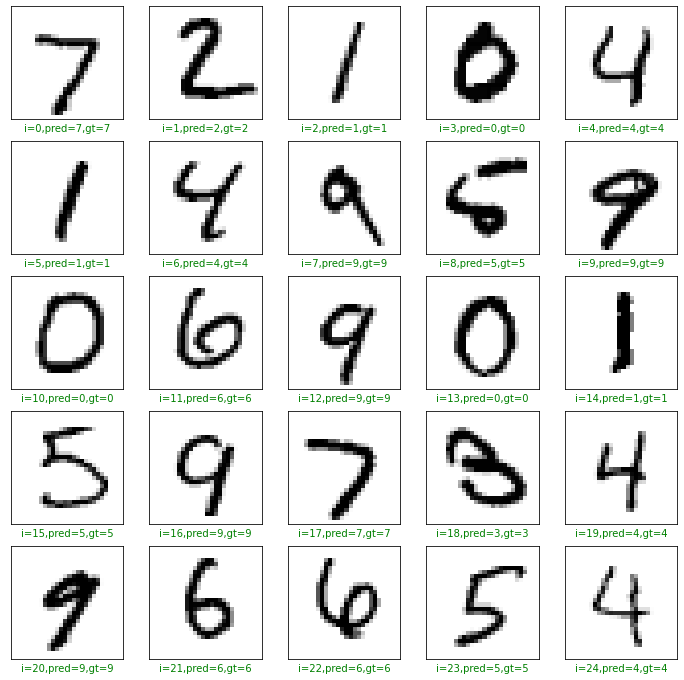

In [18]:
preds=model.predict(x_test_norm)
print('shape of preds: ',preds.shape)

plt.figure(figsize=(12,12))

start_index=0

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
    
    plt.xlabel('i={},pred={},gt={}' .format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
        
plt.show()

### Plotting the Results

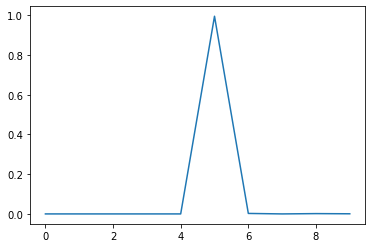

In [19]:
plt.plot(preds[8])
plt.show()